In [156]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
import scipy.fftpack as fftpack
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import os
import math
import cv2 as cv
from skimage import data, color, io, img_as_float
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from skimage.filters import threshold_mean
from skimage.filters import threshold_otsu, threshold_local
from skimage import feature
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

In [157]:
targetdir = '/Users/aimachine/Documents/JLMCurvature/FFTImageTest/'
sourceimage = '/Users/aimachine/Documents/JLMCurvature/FFTImageTest/FullResolution.tif'

base = os.path.split(sourceimage)[-1]

Filename = os.path.splitext(base)

In [158]:
Xcalibration = 0.212
Tcalibration = 5
#Enter start y pixel unit for the section
StartSection = 0
#Enter end y pixel unit for section
EndSection = 600
axes = 'XY'

Threshiold Value :  0.07206313 0.081551254 0.0
0.04077562689781189


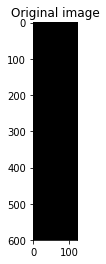

In [177]:
image = imread(sourceimage)
cutimage = image[StartSection:EndSection, :]

#Make Binary

thresh = threshold_mean(cutimage)
print("Threshiold Value : ", thresh, np.amax(cutimage), np.amin(cutimage))
mean_Val = (np.amax(cutimage) - np.amin(cutimage))/2
print(mean_Val)
binary = cutimage > mean_Val



plt.figure()
plt.imshow(binary, plt.cm.gray)
plt.title('Original image')

h, theta, d = hough_line(binary)

Slope Values found :  -4.8315653980925335
Slope Values found :  0.965717677107803
Slope Values found :  1.6101910473655887
Slope Values found :  -1.6101910473656027
Slope Values found :  -1.6101910473656027
Slope Values found :  -1.6101910473656027
Slope Values found :  1.6101910473655887
Slope Values found :  -1.6101910473656027


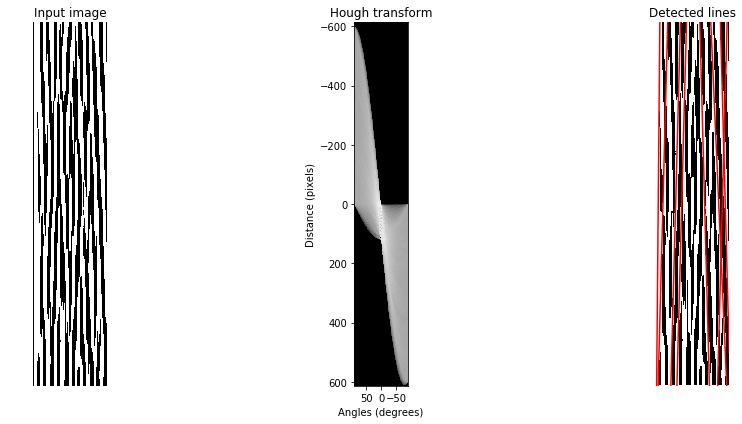

In [160]:
# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(binary, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(binary, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - binary.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, binary.shape[1]), (y0, y1), '-r')
    print("Slope Values found : " ,  - np.cos(angle) / np.sin(angle) * Xcalibration / Tcalibration)
ax[2].set_xlim((0, binary.shape[1]))
ax[2].set_ylim((binary.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()



for a in ax:
    a.set_axis_off()






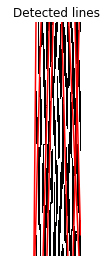

In [161]:
fig, ax = plt.subplots()

ax.imshow(binary, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - binary.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.plot((0, binary.shape[1]), (y0, y1), '-r')
ax.set_xlim((0, binary.shape[1]))
ax.set_ylim((binary.shape[0], 0))
ax.set_axis_off()
ax.set_title('Detected lines')
plt.tight_layout()
plt.show()
